In [22]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [23]:
df=pd.read_csv("Cust_Spend_Data.csv")

In [24]:
df.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [25]:
df.shape

(10, 7)

In [26]:
df.dtypes

Cust_ID             int64
Name               object
Avg_Mthly_Spend     int64
No_Of_Visits        int64
Apparel_Items       int64
FnV_Items           int64
Staples_Items       int64
dtype: object

In [27]:
df.isnull().sum()

Cust_ID            0
Name               0
Avg_Mthly_Spend    0
No_Of_Visits       0
Apparel_Items      0
FnV_Items          0
Staples_Items      0
dtype: int64

In [28]:
df1=df.iloc[:,2:]

In [29]:
custDatascaled=df1.apply(zscore)

In [30]:
custDatascaled.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033


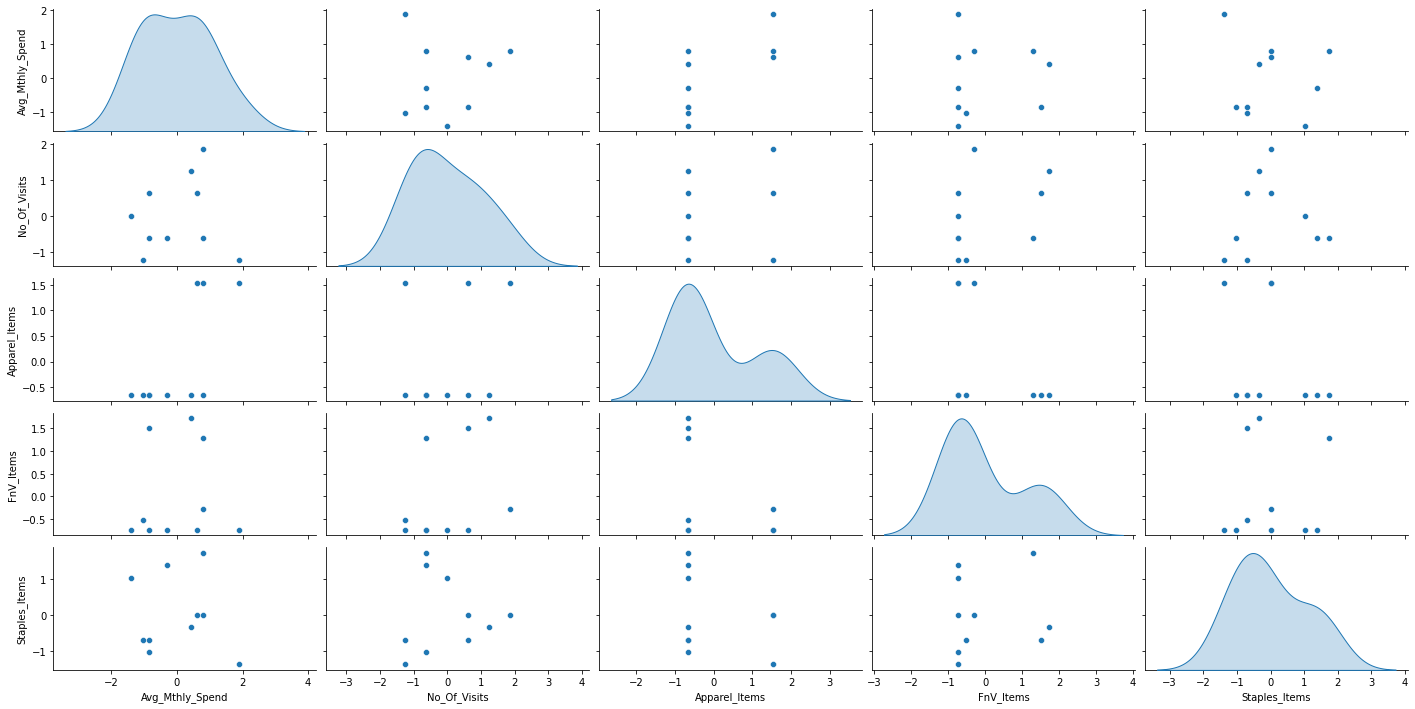

In [31]:
sns.pairplot(custDatascaled,height=2,aspect=2,diag_kind="kde")

In [32]:
from sklearn.cluster import AgglomerativeClustering

In [33]:
model=AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="average")

In [34]:
model.fit(custDatascaled)

AgglomerativeClustering(linkage='average')

In [42]:
df1["labels"]=model.labels_

In [36]:
custDatascaled.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131,1
1,0.787567,-0.620174,-0.654654,1.280656,1.725164,0
2,0.787567,1.860521,1.527525,-0.292080,0.000000,1
3,0.604412,0.620174,1.527525,-0.741433,0.000000,1
4,0.421257,1.240347,-0.654654,1.730009,-0.345033,0


In [43]:
custDataClust=df1.groupby(["labels"])

In [38]:
custDataClust

In [44]:
custDataClust.mean()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
labels,,,,,
0,3571.428571,3.714286,0.0,5.428571,4.571429
1,7833.333333,4.666667,1.0,1.666667,2.666667


In [46]:
from scipy.cluster.hierarchy import cophenet , dendrogram ,linkage

In [47]:
from scipy.spatial.distance import pdist

In [49]:
z=linkage(custDatascaled,metric="euclidean",method="average")

In [50]:
c,coph_dist=cophenet(z,pdist(custDatascaled))

In [51]:
c

0.8845840134401455

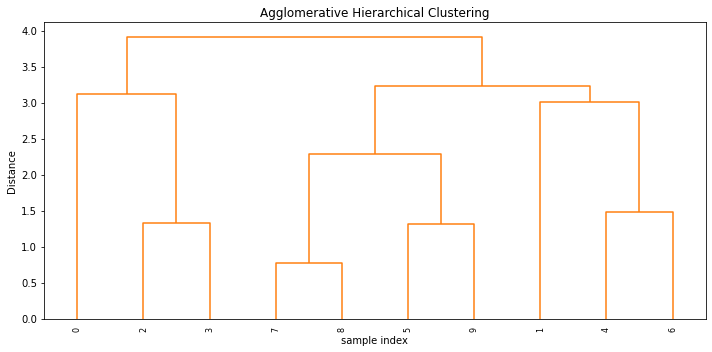

In [54]:
plt.figure(figsize=(10,5))
plt.title("Agglomerative Hierarchical Clustering")
plt.xlabel("sample index")
plt.ylabel("Distance")
dendrogram(z,leaf_rotation=90,color_threshold=40,leaf_font_size=8.)
plt.tight_layout()

In [55]:
z=linkage(custDatascaled,metric="euclidean",method="complete")
c,coph_dist=cophenet(z,pdist(custDatascaled))
c


0.8797020987632233

In [56]:
z=linkage(custDatascaled,metric="euclidean",method="single")
c,coph_dist=cophenet(z,pdist(custDatascaled))
c


0.8666617210013128

In [57]:
z=linkage(custDatascaled,metric="euclidean",method="weighted")
c,coph_dist=cophenet(z,pdist(custDatascaled))
c

0.8830112040012382

In [58]:
z=linkage(custDatascaled,metric="euclidean",method="centroid")
c,coph_dist=cophenet(z,pdist(custDatascaled))
c

0.8548164864090247

In [59]:
z=linkage(custDatascaled,metric="euclidean",method="ward")
c,coph_dist=cophenet(z,pdist(custDatascaled))
c

0.8632402929032172

In [61]:
z=linkage(custDatascaled,metric='minkowski',method="average")
c,coph_dist=cophenet(z,pdist(custDatascaled))
c

0.8845840134401455

In [62]:
z=linkage(custDatascaled,metric='minkowski',method="complete")
c,coph_dist=cophenet(z,pdist(custDatascaled))
c

0.8797020987632233

In [63]:
z=linkage(custDatascaled,metric='minkowski',method="weighted")
c,coph_dist=cophenet(z,pdist(custDatascaled))
c

0.8830112040012382

In [64]:
z=linkage(custDatascaled,metric='minkowski',method="single")
c,coph_dist=cophenet(z,pdist(custDatascaled))
c

0.8666617210013128